# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
#!pip install citipy

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key
response =  requests.get(url)
print(f"Status Code: {response.status_code}")

print(response.text)


Status Code: 400
{"cod":"400","message":"Nothing to geocode"}


In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]

        city_lng = city_weather["coord"]["lon"]
 
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
       
        city_clouds = city_weather["clouds"]["all"]
       
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
    
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | malango
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | qamdo
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | aligudarz
Processing Record 11 of Set 1 | concordia
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | jacksonville
Processing Record 15 of Set 1 | huarmey
Processing Record 16 of Set 1 | kralendijk
Processing Record 17 of Set 1 | xilin hot
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | kaa-khem
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,19.64,54,100,5.44,NZ,1707150431
1,adamstown,-25.0660,-130.1015,23.07,86,100,2.49,PN,1707150405
2,malango,-2.9627,119.9001,20.17,97,100,0.98,ID,1707150736
3,edinburgh of the seven seas,-37.0676,-12.3116,15.89,64,12,3.42,SH,1707150409
4,port alfred,-33.5906,26.8910,24.54,82,13,0.89,ZA,1707150552


In [6]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,19.64,54,100,5.44,NZ,1707150431
1,adamstown,-25.0660,-130.1015,23.07,86,100,2.49,PN,1707150405
2,malango,-2.9627,119.9001,20.17,97,100,0.98,ID,1707150736
3,edinburgh of the seven seas,-37.0676,-12.3116,15.89,64,12,3.42,SH,1707150409
4,port alfred,-33.5906,26.8910,24.54,82,13,0.89,ZA,1707150552


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

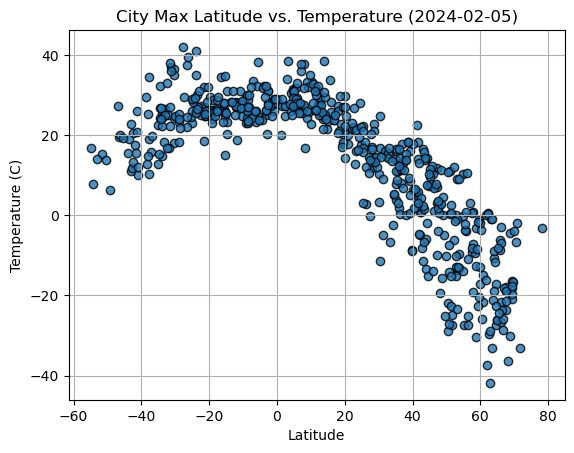

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

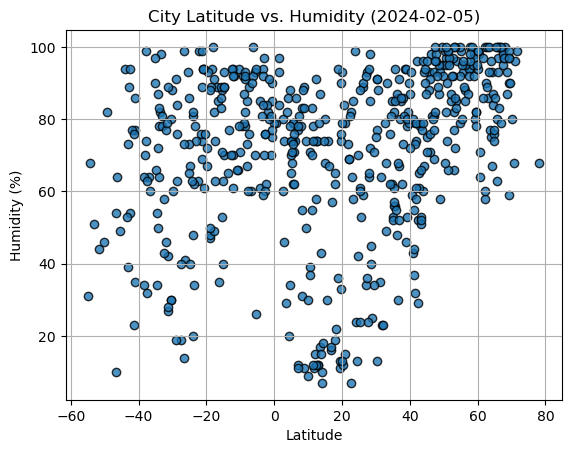

In [16]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

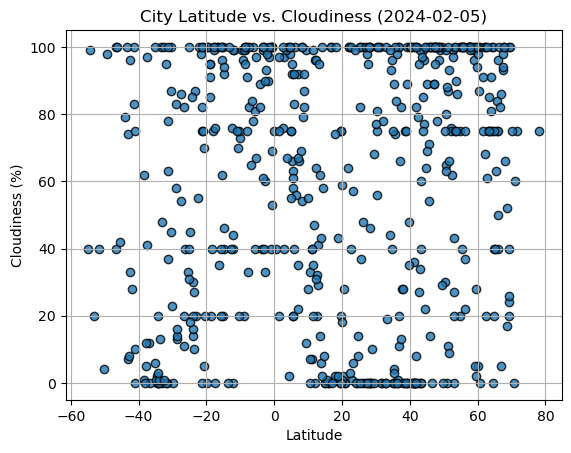

In [17]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

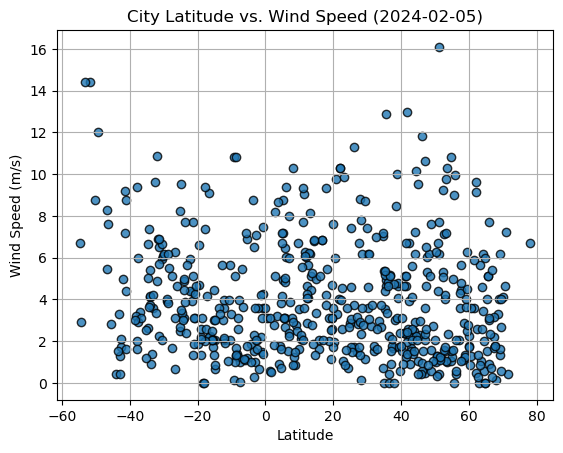

In [18]:
# Build scatter plot for latitude vs. wind speed plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values*slope + intercept
    line_y = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regression_values)
    plt.annotate(line_y, text_coord, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,qaqortoq,60.7167,-46.0333,-14.77,64,0,1.31,GL,1707150430
6,hawaiian paradise park,19.5933,-154.9731,17.80,90,20,2.57,US,1707150738
7,qamdo,31.1667,97.2333,-4.87,35,100,2.72,CN,1707150738
9,aligudarz,33.4006,49.6949,-6.72,90,19,2.97,IR,1707150739
11,petropavlovsk-kamchatsky,53.0452,158.6483,-13.67,77,0,4.02,RU,1707150420


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,19.64,54,100,5.44,NZ,1707150431
1,adamstown,-25.0660,-130.1015,23.07,86,100,2.49,PN,1707150405
2,malango,-2.9627,119.9001,20.17,97,100,0.98,ID,1707150736
3,edinburgh of the seven seas,-37.0676,-12.3116,15.89,64,12,3.42,SH,1707150409
4,port alfred,-33.5906,26.8910,24.54,82,13,0.89,ZA,1707150552


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7686592851358979


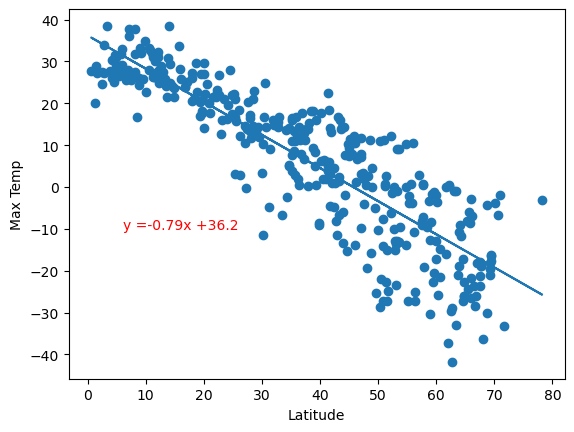

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (6, -10))


The r-value is: 0.23935318223981464


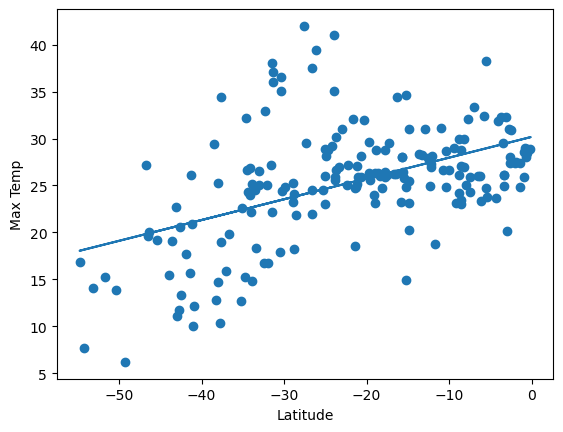

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (6, -10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2414631884759873


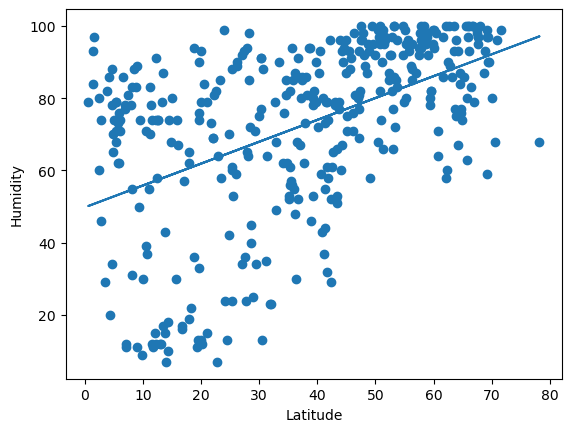

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Humidity", (6, -10))

The r-value is: 0.12335980723652869


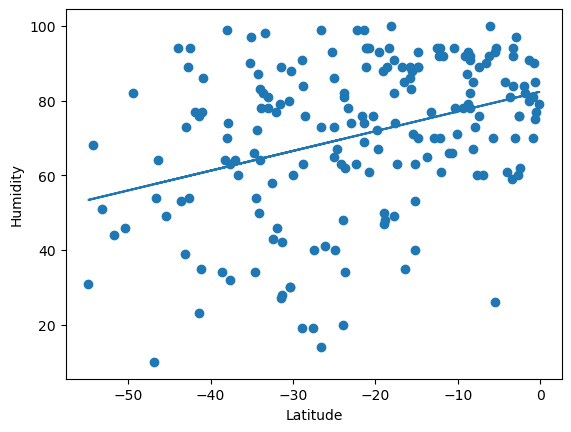

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Humidity", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03344650998450671


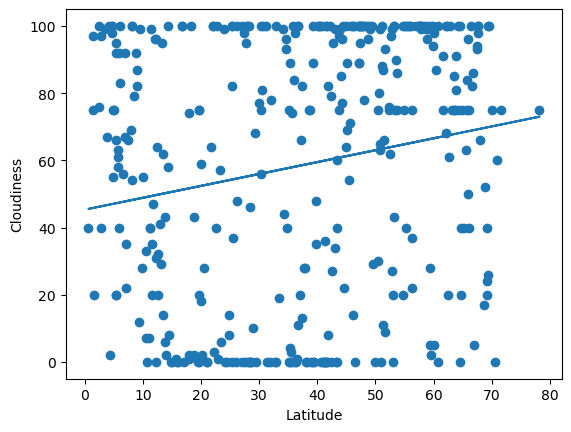

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness", (6, -10))

The r-value is: 0.1323724769789978


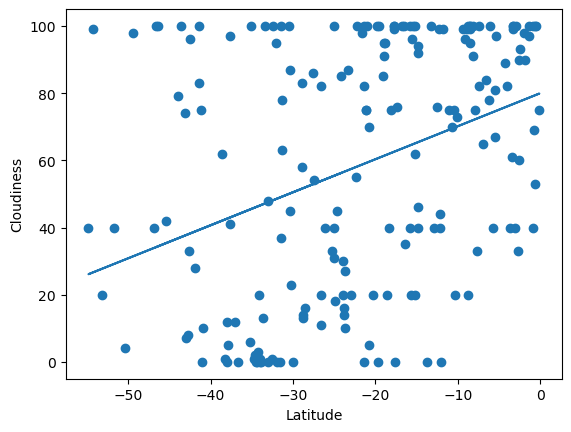

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018006702848886776


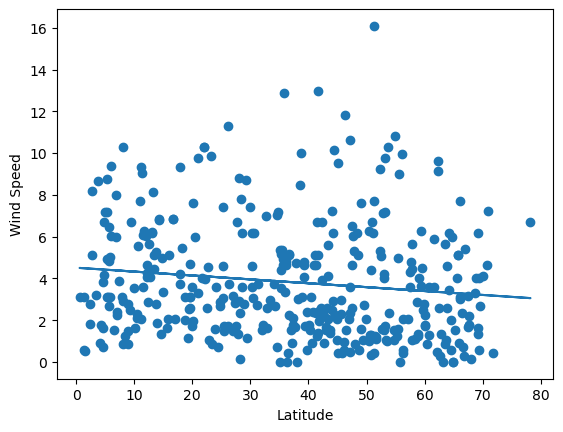

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (6, -10))

The r-value is: 0.10450500016320116


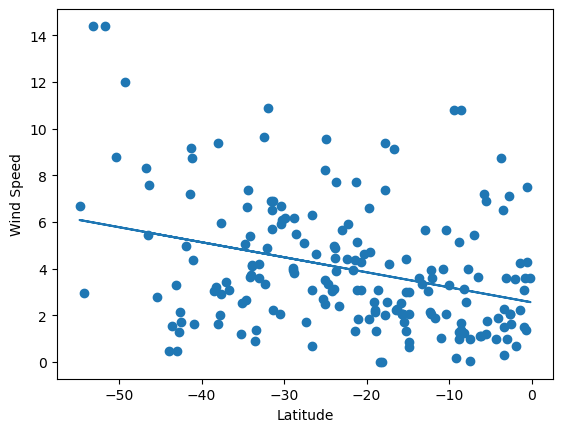

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE